60 40


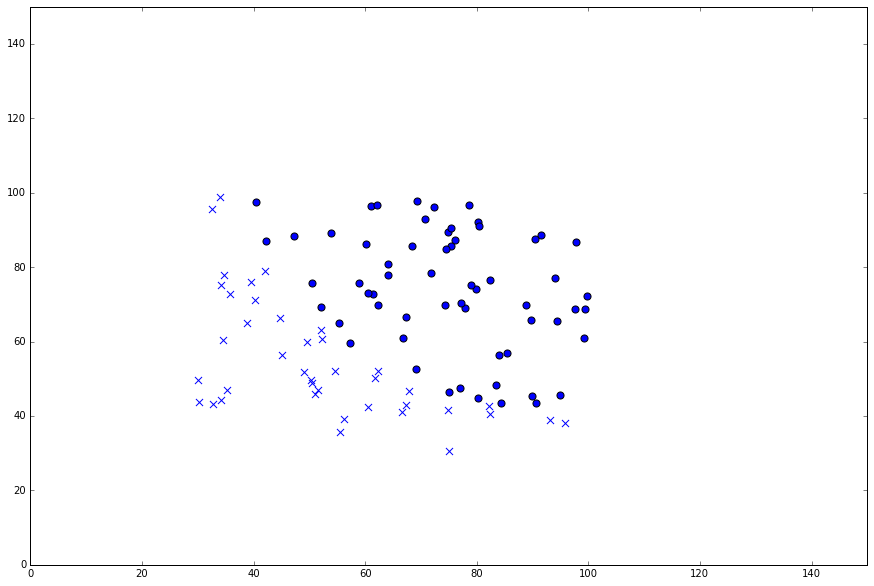

In [6]:
import csv
import matplotlib.pyplot as plt
import random
from math import exp, log

num_epochs = 100000
learning_rate = 0.01
ax_size = (0, 150, 0, 150)
data_file_name = '2d_dataset1.csv'
X = []
Y = []
Xpos = []
Xneg = []
Ypos = []
Yneg = []

csv_reader = csv.DictReader(open(data_file_name))
for row in csv_reader:
    x = (float(row['x1']), float(row['x2']))
    y = float(row['y'])
    X.append(x)
    Y.append(y)

xy = zip(X, Y)
random.shuffle(xy)
X, Y = zip(*xy)

for x, y in xy:
    Xneg.append(x) if y == 0 else Xpos.append(x)
    Yneg.append(y) if y == 0 else Ypos.append(y)
    
print len(Xpos), len(Xneg)

plt.figure(figsize=(15, 10))
plt.axis(ax_size)
x1pos, x2pos = zip(*Xpos)
x1neg, x2neg = zip(*Xneg)
plt.scatter(x1pos, x2pos, marker=('o'), s=50)
plt.scatter(x1neg, x2neg, marker=('x'), s=50)
plt.show()

In [7]:
split_idx = int(0.8 * len(Xpos))
X_train = Xpos[:split_idx]
Y_train = Ypos[:split_idx]
X_test = Xpos[split_idx:]
Y_test = Ypos[split_idx:]

split_idx = int(0.8 * len(Xneg))
X_train += Xneg[:split_idx]
Y_train += Yneg[:split_idx]
X_test += Xneg[split_idx:]
Y_test += Yneg[split_idx:]

In [8]:
sig = lambda x: (1/(1 + exp(-x)))
plt.ion()
theta = [0.0, 0.0, 0.0]
for _ in range(num_epochs):
    cost = 0.0
    theta_grads = [0.0, 0.0, 0.0]
    for x, y in zip(X_train, Y_train):
        pred = sig((x[1] * theta[2]) + (x[0] * theta[1]) + theta[0])
        cost += y * log(pred) + (1 - log(pred)) * (1 - y)
        theta_grads[0] += pred - y
        theta_grads[1] += (pred - y) * x[0]
        theta_grads[2] += (pred - y) * x[1]
    cost = cost / (len(X))
    theta[0] -= (learning_rate * (theta_grads[0]/len(X)))
    theta[1] -= (learning_rate * (theta_grads[1]/len(X)))
    theta[2] -= (learning_rate * (theta_grads[2]/len(X)))
print theta

predictions = [1.0 if (sig((x[1] * theta[2]) + (x[0] * theta[1]) + theta[0]) >= 0.5) else 0.0 for x in X_test]
print predictions
print Y_test
corr = [1 if predictions[i] == Y_test[i] else 0 for i in range(len(predictions))]
print "accuarcy : " + str((sum(corr) * 1.0)/len(corr))


[-39.06333278401391, 0.2771605724155649, 0.25072726569809434]
[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
accuarcy : 0.75
